In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [ ]:
1) Pre-process the data and fill the missing values and apply normalization 

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
iris_data = pd.read_csv("iris.csv")
features = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = np.array(iris_data['species']).reshape(-1, 1)

imputer = SimpleImputer(strategy="mean")
imputed_features = imputer.fit_transform(features)

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(imputed_features)
features = pd.DataFrame(imputed_features, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

features = pd.DataFrame(normalized_features, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])


In [ ]:
2)Apply label encoding to convert the categorical values to numerical values 

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_species = le.fit_transform(features['sepal_length'])
features['species'] = encoded_species
print(features)

     sepal_length  sepal_width  petal_length  petal_width  species
0        0.222222     0.625000      0.067797     0.041667        8
1        0.166667     0.416667      0.067797     0.041667        6
2        0.111111     0.500000      0.050847     0.041667        4
3        0.083333     0.458333      0.084746     0.041667        3
4        0.194444     0.666667      0.067797     0.041667        7
..            ...          ...           ...          ...      ...
145      0.666667     0.416667      0.711864     0.916667       24
146      0.555556     0.208333      0.677966     0.750000       20
147      0.611111     0.416667      0.711864     0.791667       22
148      0.527778     0.583333      0.745763     0.916667       19
149      0.444444     0.416667      0.694915     0.708333       16

[150 rows x 5 columns]


In [ ]:
3) Plot the dendrogram

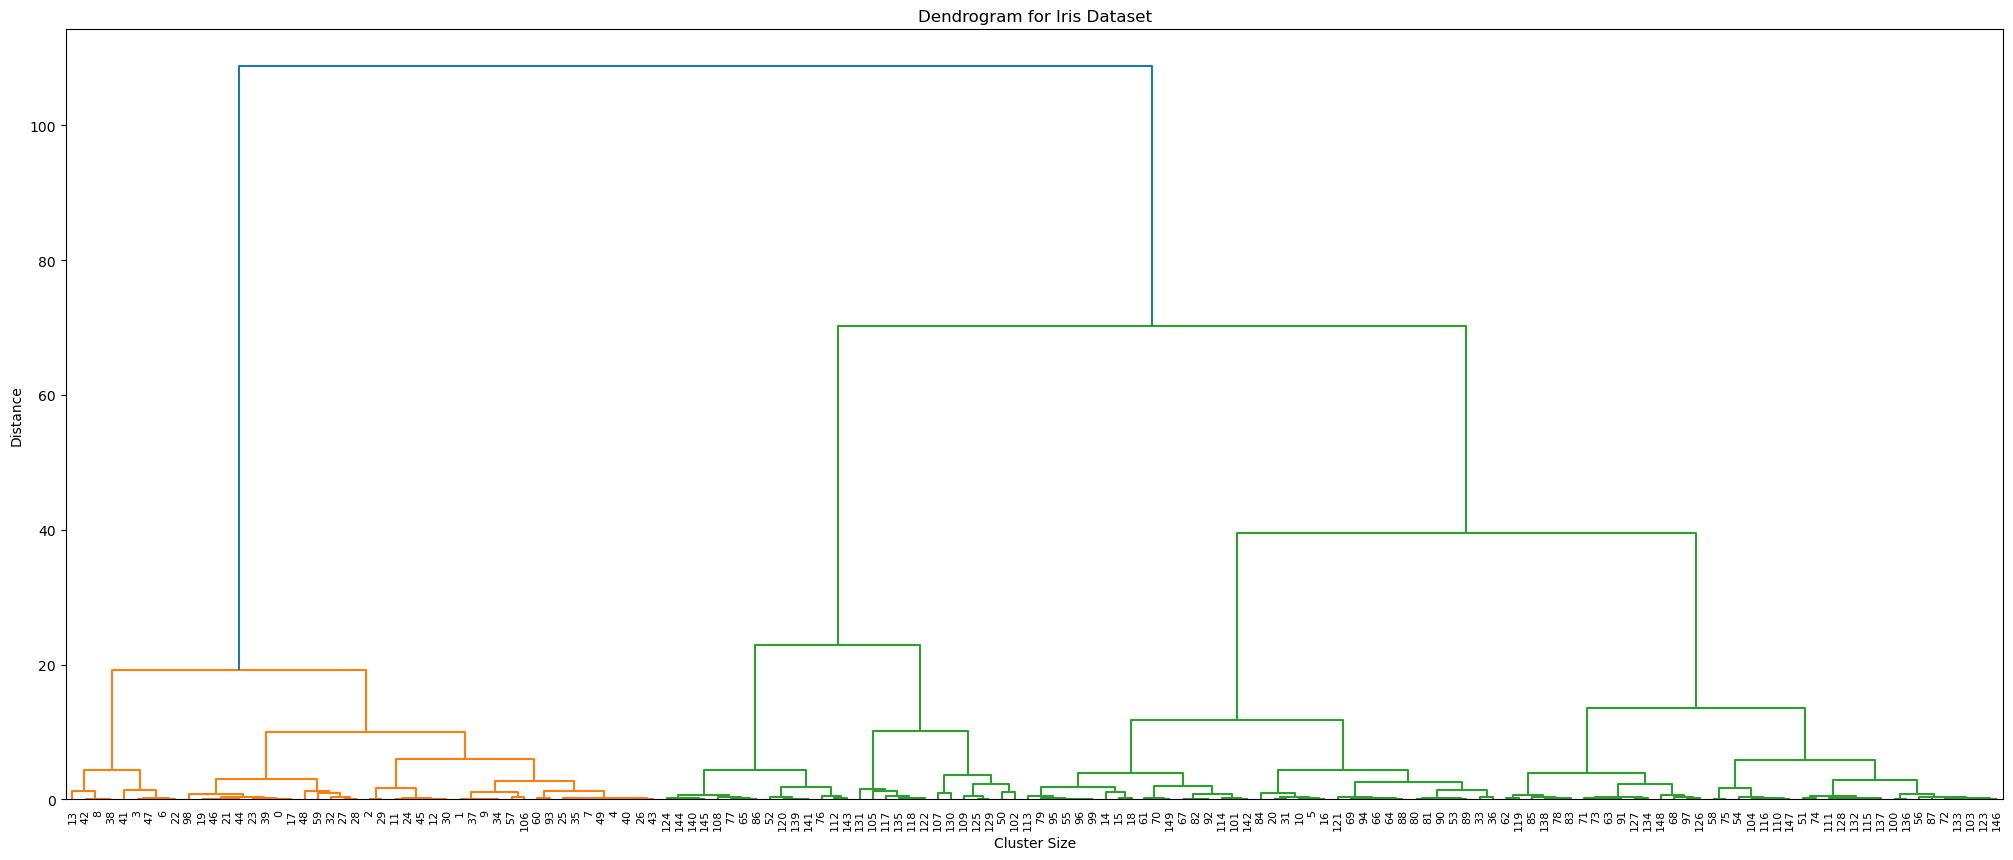

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(features, method='ward')
plt.figure(figsize=(25, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [ ]:
4) Implement agglomerative clustering algorithms to cluster the given data for different distance metrics 
(Euclidean, Manhattan, Cosine, L1, L2) and linkage functions (single, complete, average, wards)

In [35]:
from sklearn.cluster import AgglomerativeClustering
distance_metrics = ['euclidean', 'cosine', 'l1', 'l2']
linkage_functions = ['single', 'complete', 'average']

In [ ]:
5) Try with the whole dataset (except the label) and with any 2 attributes 

In [36]:
for metric in distance_metrics:
    for linkage in linkage_functions:
        ac = AgglomerativeClustering(n_clusters=3, linkage=linkage, affinity=metric)
        clusters = ac.fit_predict(features)

In [ ]:
6)Analyse the results using scatter plot 

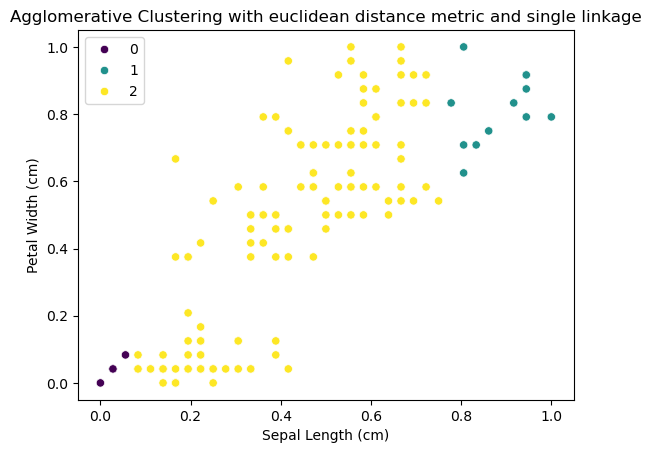

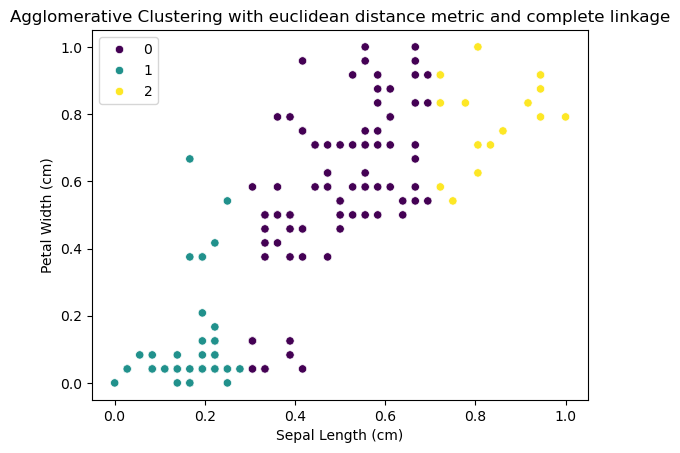

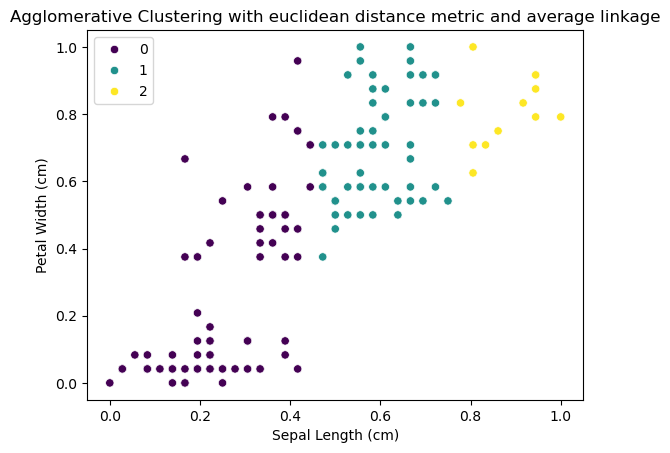

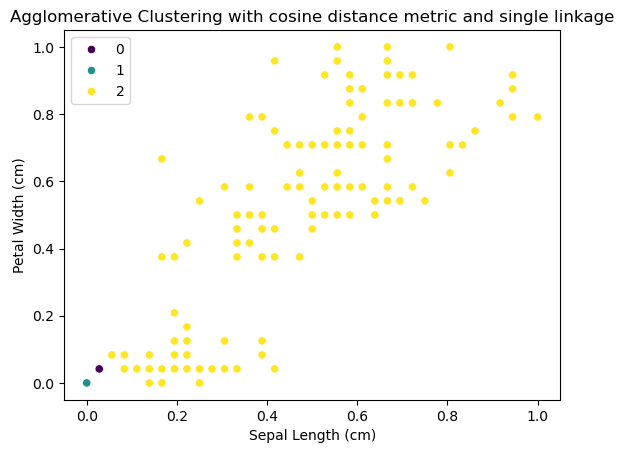

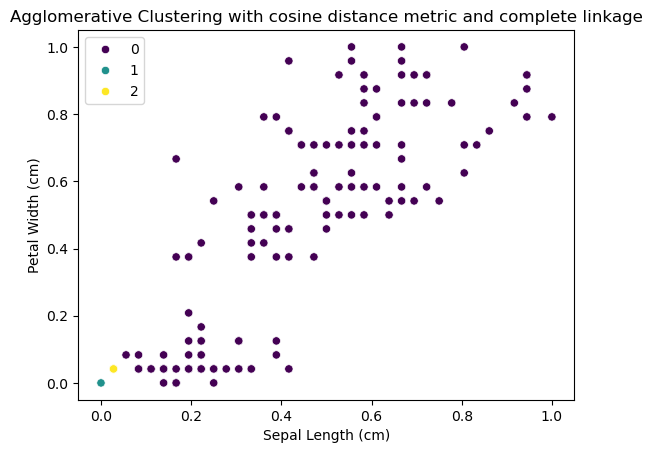

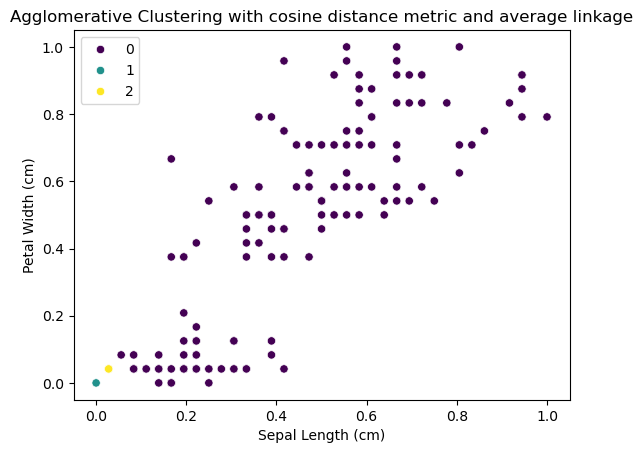

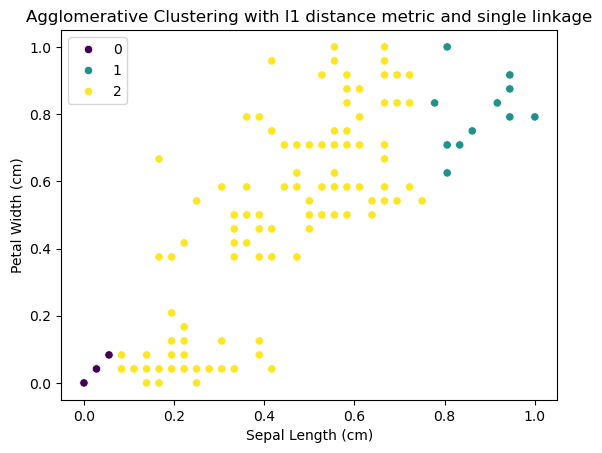

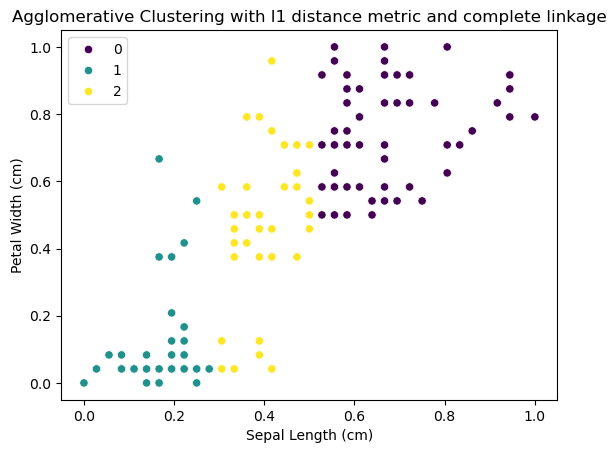

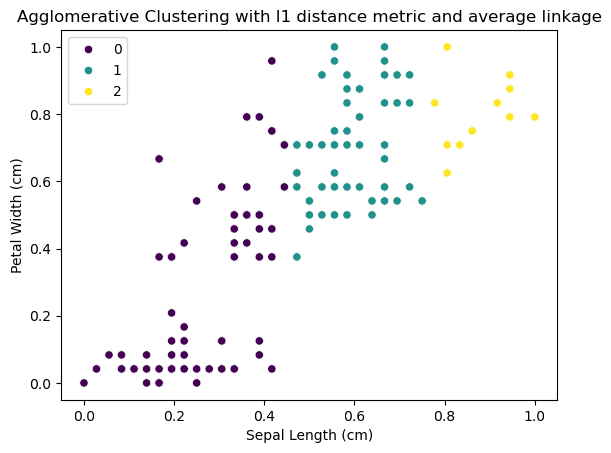

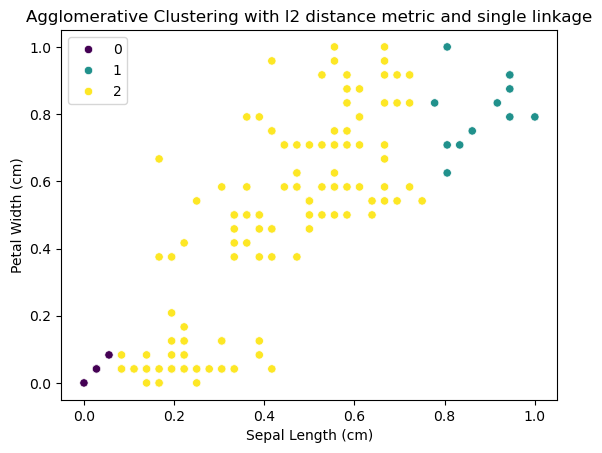

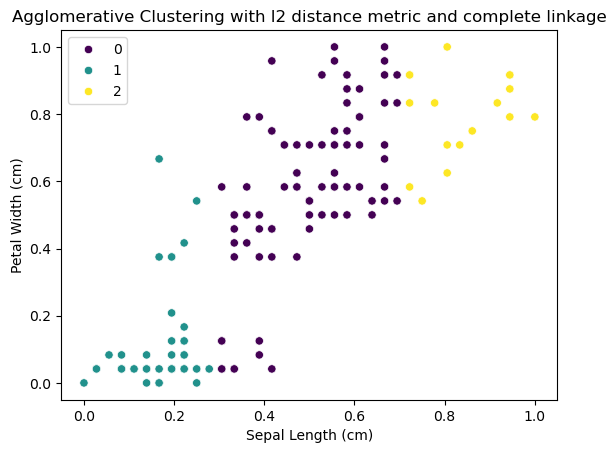

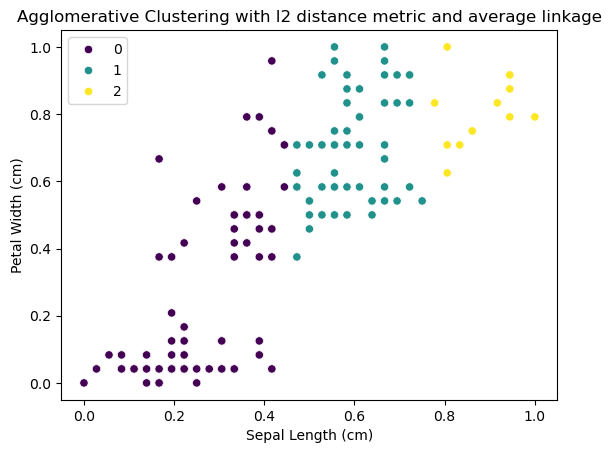

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
cluster_results = {}
for metric in distance_metrics:
    for linkage in linkage_functions:
        ac = AgglomerativeClustering(n_clusters=3, linkage=linkage, affinity=metric)
        clusters = ac.fit_predict(features)
        key = f'{metric}_{linkage}'
        cluster_results[key] = clusters
        sns.scatterplot(x=features['sepal_length'], 
                        y=features['petal_width'],
                        hue=clusters,
                        palette='viridis')
        plt.title(f'Agglomerative Clustering with {metric} distance metric and {linkage} linkage')
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.show()

In [ ]:
7)Compare the results using Mutual information, Silhouette Score (Silhouette 
Coefficient),Davies-Bouldin 

In [31]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.cluster import AgglomerativeClustering
for metric in distance_metrics:
    for linkage in linkage_functions:
        ac = AgglomerativeClustering(n_clusters=3, linkage=linkage, affinity=metric)
        clusters = ac.fit_predict(features)
        mi_score = round(mutual_info_score(features['species'], clusters),3)
        sil_score = round(silhouette_score(features, clusters),3)
        print(f'Distance metric: {metric} and linkage:{linkage}')
        print(f'Mutual Information Score: {mi_score}')
        print(f'Silhouette Score: {sil_score}')
        print('.................................')    

Distance metric: euclidean and linkage:single
Mutual Information Score: 0.422
Silhouette Score: 0.187
.................................
Distance metric: euclidean and linkage:complete
Mutual Information Score: 0.925
Silhouette Score: 0.5
.................................
Distance metric: euclidean and linkage:average
Mutual Information Score: 0.897
Silhouette Score: 0.557
.................................
Distance metric: cosine and linkage:single
Mutual Information Score: 0.138
Silhouette Score: 0.259
.................................
Distance metric: cosine and linkage:complete
Mutual Information Score: 0.138
Silhouette Score: 0.259
.................................
Distance metric: cosine and linkage:average
Mutual Information Score: 0.138
Silhouette Score: 0.259
.................................
Distance metric: l1 and linkage:single
Mutual Information Score: 0.422
Silhouette Score: 0.187
.................................
Distance metric: l1 and linkage:complete
Mutual Information 